<a href="https://colab.research.google.com/github/OCR-tech/AdaptDL/blob/main/test1/cam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


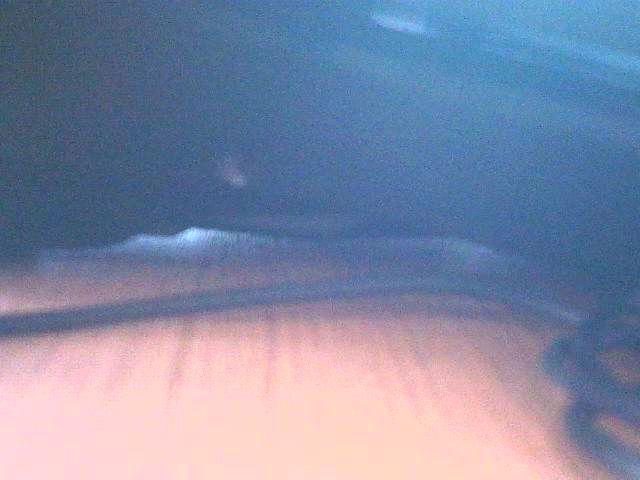

In [4]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

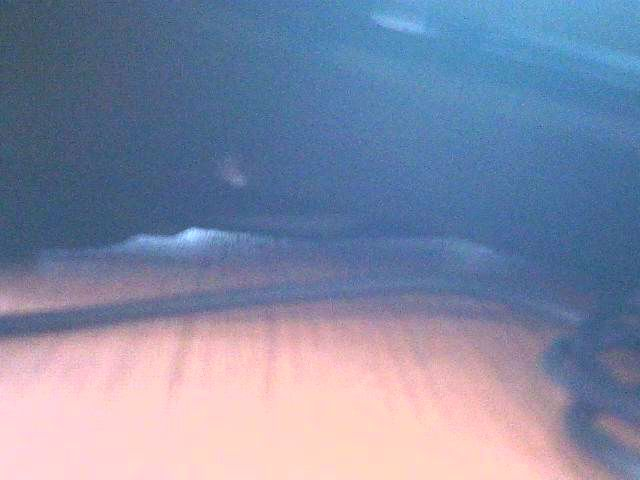

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import requests
from io import BytesIO
import numpy as np

url = "/content/photo.jpg"

#  Read the image directly from Colab's file system
#  since it's unlikely to be externally accessible.
img = cv2.imread(url, cv2.IMREAD_UNCHANGED)

# Check if the image was loaded correctly
if img is not None:
  cv2_imshow(img)
else:
  print(f"Error: Could not read the image from {url}.")

In [6]:
import keyboard

def main():
    while True:
        print("//==============================//")
        # process_frame()

        # command = listen_for_command()
        # command = "start"
        # if command == "start":
        #     give_feedback("Starting object detection.")
        #     process_frame()
        # elif command == "stop":
        #     give_feedback("Stopping object detection.")
        #     break
        # else:
        #     give_feedback("Invalid command. Please say 'start' or 'stop'.")

        if keyboard.is_pressed('esc'):
          print("Exiting...")
          break  # Exit the loop when Esc is pressed


if __name__ == "__main__":
    print("//==============================//")
    main()
    print("Program ended.")


Streaming output truncated to the last 5000 lines.
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==============================//
//==

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-ffbd6a39716c>", line 19, in <cell line: 0>
    main()
  File "<ipython-input-6-ffbd6a39716c>", line 3, in main
    print("//==============================//")
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 402, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 203, in schedule
    self._event_pipe.send(b'')
  File "/usr/local/lib/python3.11/dist-packages/zmq/sugar/socket.py", line 620, in send
    return super().send(data, flags=flags, copy=copy, track=track)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "zmq/backend/cython/socket.pyx", line 746, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython

TypeError: object of type 'NoneType' has no len()